In [244]:
#%matplotlib qt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data 

In [245]:
df = pd.read_csv("mail_data.csv", encoding="utf-8")

Explore Data

In [246]:
df.head()

,Category,Message
0,spam,"Hey Herman, You have won 12.000 Euro"
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


In [247]:
df.shape

(5573, 2)

In [248]:
df.describe()

,Category,Message
count,5573,5573
unique,2,5158
top,ham,"Sorry, I'll call later"
freq,4825,30


In [249]:
df.drop_duplicates().head(5)

,Category,Message
0,spam,"Hey Herman, You have won 12.000 Euro"
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...


In [250]:
df= df.rename(columns={'Category':'Label'})

In [251]:
df['Size'] = df ['Message'].apply(len)
df

,Label,Message,Size
0,spam,"Hey Herman, You have won 12.000 Euro",36
1,ham,"Go until jurong point, crazy.. Available only ...",111
2,ham,Ok lar... Joking wif u oni...,29
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,ham,U dun say so early hor... U c already then say...,49
...,...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...,160
5569,ham,Will ü b going to esplanade fr home?,36
5570,ham,"Pity, * was in mood for that. So...any other s...",57
5571,ham,The guy did some bitching but I acted like i'd...,125


Plotting

<Axes: ylabel='Frequency'>

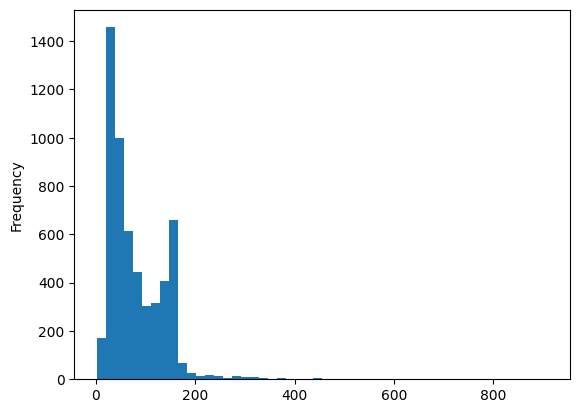

In [252]:
df['Size'].plot(bins=50, kind='hist')

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

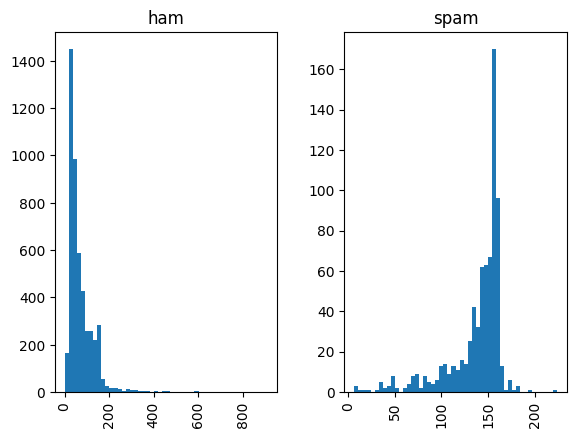

In [253]:
df.hist(column='Size', by='Label',bins=50)

Label Encoding

In [254]:
#spam : 1
#ham  : 0
df['Label'] = df.Label.map({'spam':1,'ham':0})

In [255]:
#wir trennen die Datensätze vonaneinder ab

X = df['Message'].str.lower()
Y = df['Label']

Model Training

In [256]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [257]:
x_train, x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

Pipeline Stufen

In [258]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
pipeline_steps = [
    ("tfidf_vectorizer", TfidfVectorizer()), #Text in Zahlenvektoren umwandeln
    ("classifier", MultinomialNB()) #Klassifikationsmodell
]


Pipeline erstellen

In [259]:
pipeline = Pipeline(pipeline_steps)


Modell auf den Trainingsdaten trainieren

In [260]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

Vorhersagen auf den Testdaten machen

In [261]:
X = pipeline.predict(x_test)

Model Validierung 

In [262]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

 Metriken berechnen

In [263]:
accuracy = accuracy_score( X, y_test)
precision = precision_score(X, y_test)
recall = recall_score(X,y_test)
f1 = f1_score(X,y_test)

Ergebnisse ausgeben

In [264]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.9632286995515695
Precision: 0.7248322147651006
Recall: 1.0
F1-Score: 0.8404669260700389


Building the predictive Training

In [265]:
input = ["You have won 1.000 Euro..."]

In [266]:
pred = pipeline.predict(input)

In [267]:
if pred == 1:
    print("Das ist eine Spam Nachricht")
else:
    print("Das ist eine normale Nachricht")

Das ist eine Spam Nachricht
